In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('beijing_grouped_daily.csv')

In [119]:
df

,date,year,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,...,WSW,AQI_PM2.5,AQI_PM10,AQI_CO,AQI_NO2,AQI_SO2,AQI_O3,AQI,weekday,Pollution
0,2013-03-01,2013.0,11.5,7.261364,13.275486,3.505375,14.341677,0.348265,0.032490,1.093182,...,0.000000,23.446285,11.968818,3.957552,13.529884,5.007678,30.083737,35.388329,1.0,good
1,2013-03-02,2013.0,11.5,31.526515,40.919940,11.294616,28.053480,0.772689,0.015471,0.222348,...,0.060606,74.560500,33.772307,8.780553,26.109911,16.135166,14.324617,78.379442,0.0,moderate
2,2013-03-03,2013.0,11.5,77.772727,109.344697,17.254908,37.503760,1.419104,0.011585,5.256818,...,0.015152,144.025014,77.398620,16.126176,34.947023,24.430721,10.727299,144.425585,0.0,usg
3,2013-03-04,2013.0,11.5,23.176567,41.445940,6.819097,22.596189,0.604732,0.028184,9.626515,...,0.018939,60.183106,34.758265,6.871956,20.962543,9.741567,26.096449,64.684175,1.0,moderate
4,2013-03-05,2013.0,11.5,129.179116,158.106061,25.174703,51.026083,1.649297,0.037918,6.574621,...,0.000000,187.914737,102.096521,18.742008,48.662423,34.819271,35.109718,192.124685,1.0,unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2017-02-24,2017.0,11.5,24.279938,37.878400,3.418476,21.716438,0.569965,0.022355,4.850379,...,0.037879,64.979397,32.691370,6.476874,20.489548,4.883537,20.698901,66.482887,1.0,moderate
1457,2017-02-25,2017.0,11.5,11.770651,22.266852,2.082350,15.123112,0.390930,0.028563,7.021591,...,0.071970,36.725308,20.476660,4.442383,14.267087,2.974786,30.928948,46.302496,0.0,good
1458,2017-02-26,2017.0,11.5,27.816106,45.149427,3.643582,24.807694,0.587603,0.020739,6.729167,...,0.030303,74.424945,39.155889,6.677308,23.403485,5.205117,19.202728,74.575859,0.0,moderate
1459,2017-02-27,2017.0,11.5,66.816611,97.045753,6.062260,36.852067,1.073475,0.013933,7.699621,...,0.030303,139.805923,71.871183,12.198582,34.471493,8.660372,13.816377,142.004456,1.0,usg


In [120]:
#categorize aqi score level i.e. good/moderate/unhealthy etc.

def aqi_level(x):
    if (0 <= x <= 50):
        return "good"
    elif (51 <= x <= 100):
        return  "moderate"
    elif (101 <= x <= 150):
        return "usg"
    elif (151 <= x <= 200):
        return "unhealthy"
    elif (201 <= x <= 300):
        return "very unhealthy"
    elif (301 <= x <= 500):
        return "hazardous"


In [121]:
d = df['AQI'].apply(lambda x: aqi_level(x))
df['Pollution'] = d

In [125]:
len(df[df['Pollution'] == 'good'])

92

In [167]:
pollution_counts = {'Good': len(df[df['Pollution'] == 'good']) ,
                          'Moderate': len(df[df['Pollution'] == 'moderate']) , 
                          'USG': len(df[df['Pollution'] == 'usg']), 
                          'Unhealthy': len(df[df['Pollution'] == 'unhealthy']), 
                          'Very Unhealthy': len(df[df['Pollution'] == 'very unhealthy']), 
                          'Hazardous': len(df[df['Pollution'] == 'hazardous'])}
pollution_counts


{'Good': 92,
 'Hazardous': 39,
 'Moderate': 365,
 'USG': 406,
 'Unhealthy': 365,
 'Very Unhealthy': 174}

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


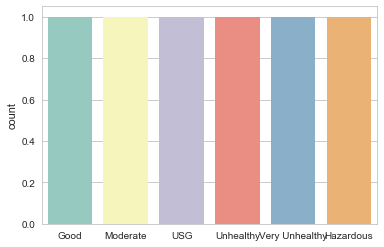

In [168]:
labels = list(pollution_counts.keys())
sizes = list(pollution_counts.values())

df_counts = pd.DataFrame({'Count': sizes}, index = labels)
df_counts

# fig, ax = plt.subplots()
# ax.bar(labels, sizes)
# plt.show()

ax = sns.countplot(x=labels, data = df_counts, palette="Set3")
plt.show()



/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


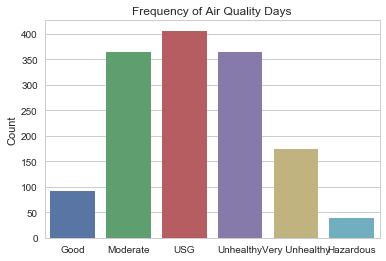

In [171]:
sns.set(style="whitegrid")
ax = sns.barplot(x= labels, y="Count", data=df_counts)
plt.title('Frequency of Air Quality Days')
plt.savefig('pollution_counts.png')
plt.show()



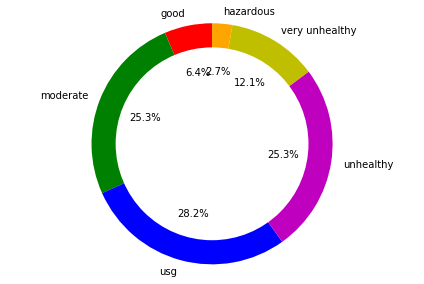

In [148]:
labels = list(pollution_counts.keys())
sizes = list(pollution_counts.values())
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0.1, 0.1, 0, 0)
#add colors
colors = ['r', 'g', 'b', 'm', 'y', 'orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [62]:
yr1 = df.iloc[:366, :]
yr2 = df.iloc[366:731, :]
yr3 = df.iloc[731: 1096, :]

In [66]:
df.iloc[:366].describe()['AQI']

count    366.000000
mean     146.073795
std       66.315018
min       33.122881
25%      102.908679
50%      139.858218
75%      185.582489
max      414.303611
Name: AQI, dtype: float64

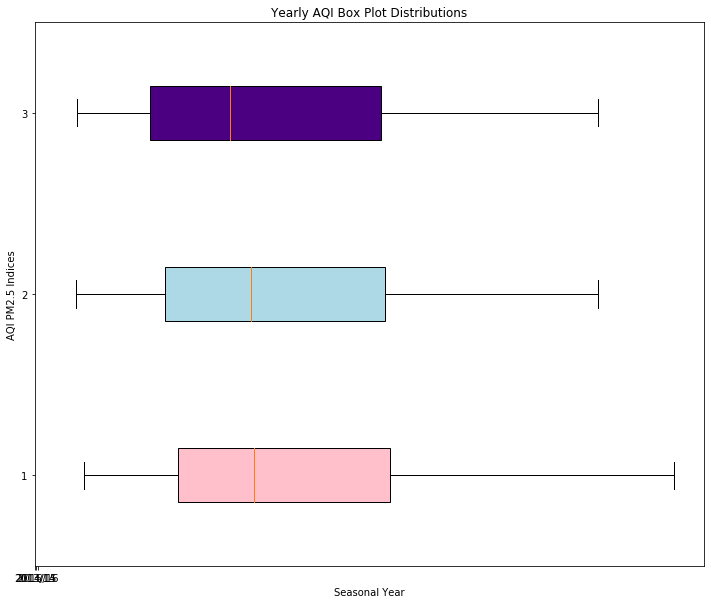

In [21]:
plt.show()

In [72]:
df_pca = df.copy()
df_pca.drop(['date', 'year', 'hour', 'AQI_PM2.5', 'AQI_PM10', 'AQI_CO',
                  'AQI_NO2','AQI_SO2','AQI_O3','AQI'], axis =1 , inplace = True)

In [73]:
df_pca

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,...,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,weekday
0,7.261364,13.275486,3.505375,14.341677,0.348265,0.032490,1.093182,1026.630303,-20.188636,0.0,...,0.147727,0.003788,0.003788,0.003788,0.003788,0.000000,0.018939,0.018939,0.000000,1.0
1,31.526515,40.919940,11.294616,28.053480,0.772689,0.015471,0.222348,1026.601136,-16.344318,0.0,...,0.030303,0.034091,0.022727,0.030303,0.087121,0.060606,0.049242,0.034091,0.060606,0.0
2,77.772727,109.344697,17.254908,37.503760,1.419104,0.011585,5.256818,1014.256061,-12.375000,0.0,...,0.098485,0.007576,0.034091,0.022727,0.030303,0.007576,0.094697,0.140152,0.015152,0.0
3,23.176567,41.445940,6.819097,22.596189,0.604732,0.028184,9.626515,1017.303030,-12.860606,0.0,...,0.090909,0.034091,0.026515,0.041667,0.121212,0.117424,0.022727,0.022727,0.018939,1.0
4,129.179116,158.106061,25.174703,51.026083,1.649297,0.037918,6.574621,1010.608712,-7.957576,0.0,...,0.011364,0.030303,0.053030,0.030303,0.030303,0.045455,0.015152,0.041667,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,24.279938,37.878400,3.418476,21.716438,0.569965,0.022355,4.850379,1019.198106,-11.370833,0.0,...,0.121212,0.003788,0.022727,0.022727,0.011364,0.018939,0.071970,0.200758,0.037879,1.0
1457,11.770651,22.266852,2.082350,15.123112,0.390930,0.028563,7.021591,1017.010227,-10.570833,0.0,...,0.212121,0.026515,0.022727,0.000000,0.011364,0.003788,0.075758,0.189394,0.071970,0.0
1458,27.816106,45.149427,3.643582,24.807694,0.587603,0.020739,6.729167,1018.506818,-7.982576,0.0,...,0.071970,0.075758,0.026515,0.034091,0.060606,0.151515,0.022727,0.018939,0.030303,0.0
1459,66.816611,97.045753,6.062260,36.852067,1.073475,0.013933,7.699621,1015.343182,-7.103788,0.0,...,0.026515,0.071970,0.015152,0.053030,0.113636,0.151515,0.003788,0.007576,0.030303,1.0


In [75]:
import pandas as pd
import numpy as np
from numpy.linalg import svd, eig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [78]:
from sklearn.preprocessing import StandardScaler
features = [i for i in df_pca.columns]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, 'AQI'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [82]:
df_pca.shape

(1461, 32)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                          'principal component 4', 'principal component 5'])

In [86]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,4.555701,-1.176173,0.483056,1.512513,-1.898803
1,1.540243,0.761462,-0.620407,1.281074,0.954846
2,2.250127,1.465178,-0.591567,-1.534172,-0.748338
3,1.261575,-1.162061,-1.595291,1.021300,-0.618192
4,-0.525739,3.513231,0.554571,-0.023533,-1.343282
...,...,...,...,...,...
1456,3.816806,-0.528270,-0.388523,-0.258418,0.127236
1457,3.986118,-1.609965,-1.178009,-0.740349,-0.023919
1458,1.107058,0.099164,-0.836038,2.163357,1.061618
1459,0.517468,1.068489,-0.989564,1.578569,1.007977


In [89]:
finalDf = pd.concat([principalDf, df['AQI']], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,AQI
0,4.555701,-1.176173,0.483056,1.512513,-1.898803,35.388329
1,1.540243,0.761462,-0.620407,1.281074,0.954846,78.379442
2,2.250127,1.465178,-0.591567,-1.534172,-0.748338,144.425585
3,1.261575,-1.162061,-1.595291,1.021300,-0.618192,64.684175
4,-0.525739,3.513231,0.554571,-0.023533,-1.343282,192.124685
...,...,...,...,...,...,...
1456,3.816806,-0.528270,-0.388523,-0.258418,0.127236,66.482887
1457,3.986118,-1.609965,-1.178009,-0.740349,-0.023919,46.302496
1458,1.107058,0.099164,-0.836038,2.163357,1.061618,74.575859
1459,0.517468,1.068489,-0.989564,1.578569,1.007977,142.004456
